### Build Machine Learning Models for Divvy to Classify if a person is a Member or a Casual rider

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import pickle 
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
st=pd.read_csv("Divvy_Trip.csv")

In [3]:
st.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member


In [4]:
train, test = train_test_split(st, test_size=0.2, random_state=42)

In [5]:
train.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
221144,C04FAC45C1F376B9,electric_bike,2023-10-19 16:21:35,2023-10-19 16:58:29,Michigan Ave & 14th St,TA1307000124,Millennium Park,13008,41.864565,-87.623628,41.881032,-87.624084,casual
369058,F19C66D772D9127A,classic_bike,2023-10-26 16:52:47,2023-10-26 17:04:25,Loomis St & Lexington St,13332,Loomis St & Lexington St,13332,41.872229,-87.661364,41.872229,-87.661364,casual
228995,F1BFBC30BB9516E5,electric_bike,2023-10-19 14:40:10,2023-10-19 14:43:58,DuSable Lake Shore Dr & North Blvd,LF-005,Michigan Ave & Oak St,13042,41.911775,-87.626899,41.900960,-87.623777,member
493658,786707E893C370D9,electric_bike,2023-10-03 16:31:23,2023-10-03 16:34:06,NaN,NaN,NaN,NaN,41.890000,-87.610000,41.890000,-87.610000,casual
383264,2F4D13F5E211A299,classic_bike,2023-10-01 10:04:37,2023-10-01 10:11:24,Wilton Ave & Belmont Ave,TA1307000134,Racine Ave & Fullerton Ave,TA1306000026,41.940232,-87.652944,41.925566,-87.658416,member


In [6]:
#A1
train.reset_index(drop=True, inplace=True)

In [7]:
train.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [8]:
import datetime

In [9]:
#A2
train["started_at"] = pd.to_datetime(train["started_at"])
train["ended_at"] = pd.to_datetime(train["ended_at"])

In [10]:
train.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [11]:
#A3
train["ride_duration"] = train["ended_at"]-train["started_at"]
train['ride_duration']=train["ride_duration"].apply(lambda x:int(x.total_seconds()))
train['ride_duration']

0         2214
1          698
2          228
3          163
4          407
          ... 
429685     344
429686     395
429687    1087
429688     253
429689     178
Name: ride_duration, Length: 429690, dtype: int64

In [12]:
train.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_duration                  int64
dtype: object

In [13]:
#A4
train["hour"] = train["started_at"].dt.hour
train["month"] = train["started_at"].dt.month
train["day_week_name"] = train["started_at"].dt.day_name()

In [14]:
def drop_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

In [15]:
train.shape

(429690, 17)

In [16]:
#A5
train = drop_outlier(train, "ride_duration")

In [17]:
train.shape

(397802, 17)

In [18]:
train.drop(["ride_id", "started_at", "ended_at", "start_station_id", "end_station_id"],
           axis=1, inplace=True)

In [19]:
#A7
#Splitting our train dataset into features and target
target = "member_casual"
X_train = train.drop(target, axis=1) #features
y_train = train[target] #Target

In [20]:
cat = []
for i in X_train.columns:
    if X_train[i].dtype == "object":
        cat.append(i)

num = []
for i in X_train.columns:
    if X_train[i].dtype != "object":
        num.append(i)

In [21]:
num

['start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'ride_duration',
 'hour',
 'month']

In [22]:
cat

['rideable_type', 'start_station_name', 'end_station_name', 'day_week_name']

### Scaling

In [23]:
cat_trans = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse=False))
])

num_trans = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_trans, num),
        ("cat", cat_trans, cat)
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

In [24]:
pipe_fit = pipeline.fit(X_train)

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be r

In [25]:
#A8
X_train1 = pd.DataFrame(pipe_fit.transform(X_train), columns = pipe_fit.get_feature_names_out().tolist())
X_train1

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

,num__start_lat,num__start_lng,num__end_lat,num__end_lng,num__ride_duration,num__hour,num__month,cat__rideable_type_electric_bike,cat__start_station_name_63rd St Beach,cat__start_station_name_900 W Harrison St,cat__start_station_name_Aberdeen St & Jackson Blvd,cat__start_station_name_Aberdeen St & Monroe St,cat__start_station_name_Aberdeen St & Randolph St,cat__start_station_name_Ada St & Washington Blvd,cat__start_station_name_Adler Planetarium,cat__start_station_name_Albany Ave & 26th St,cat__start_station_name_Albany Ave & Belmont Ave,cat__start_station_name_Albany Ave & Bloomingdale Ave,cat__start_station_name_Albany Ave & Montrose Ave,cat__start_station_name_Altgeld Gardens,cat__start_station_name_Archer (Damen) Ave & 37th St,cat__start_station_name_Archer Ave & 43rd St,cat__start_station_name_Artesian Ave & 55th St,cat__start_station_name_Artesian Ave & 71st St,cat__start_station_name_Artesian Ave & Hubbard St,cat__start_station_name_Artesian Ave & Marquette Rd,cat__start_station_name_Ashland Ave & 13th St,cat__start_station_name_Ashland Ave & 50th St,cat__start_station_name_Ashland Ave & 63rd St,cat__start_station_name_Ashland Ave & 66th St,cat__start_station_name_Ashland Ave & 74th St,cat__start_station_name_Ashland Ave & 78th St,cat__start_station_name_Ashland Ave & Archer Ave,cat__start_station_name_Ashland Ave & Augusta Blvd,cat__start_station_name_Ashland Ave & Belle Plaine Ave,cat__start_station_name_Ashland Ave & Blackhawk St,cat__start_station_name_Ashland Ave & Chicago Ave,cat__start_station_name_Ashland Ave & Division St,cat__start_station_name_Ashland Ave & Garfield Blvd,cat__start_station_name_Ashland Ave & Grace St,cat__start_station_name_Ashland Ave & Grand Ave,cat__start_station_name_Ashland Ave & Lake St,cat__start_station_name_Ashland Ave & McDowell Ave,cat__start_station_name_Ashland Ave & Pershing Rd,cat__start_station_name_Ashland Ave & Wellington Ave,cat__start_station_name_Ashland Ave & Wrightwood Ave,cat__start_station_name_Augusta Blvd & Laramie Ave,cat__start_station_name_Austin Blvd & Chicago Ave,cat__start_station_name_Austin Blvd & Lake St,cat__start_station_name_Austin Blvd & Madison St,cat__start_station_name_Avenue L & 114th St,cat__start_station_name_Avenue O & 118th St,cat__start_station_name_Avenue O & 134th St,cat__start_station_name_Avers Ave & Belmont Ave,cat__start_station_name_Avondale Ave & Irving Park Rd,cat__start_station_name_Baltimore Ave & 87th St,cat__start_station_name_Bennett Ave & 79th St,cat__start_station_name_Benson Ave & Church St,cat__start_station_name_Bernard St & Elston Ave,cat__start_station_name_Big Marsh Park,cat__start_station_name_Bissell St & Armitage Ave*,cat__start_station_name_Blackstone Ave & 59th St,cat__start_station_name_Blackstone Ave & Hyde Park Blvd,cat__start_station_name_Bloomingdale Ave & Harlem Ave,cat__start_station_name_Blue Island Ave & 18th St,cat__start_station_name_Bosworth Ave & Howard St,cat__start_station_name_Broadway & Argyle St,cat__start_station_name_Broadway & Barry Ave,cat__start_station_name_Broadway & Belmont Ave,cat__start_station_name_Broadway & Berwyn Ave,cat__start_station_name_Broadway & Cornelia Ave,cat__start_station_name_Broadway & Granville Ave,cat__start_station_name_Broadway & Ridge Ave,cat__start_station_name_Broadway & Sheridan Rd,cat__start_station_name_Broadway & Thorndale Ave,cat__start_station_name_Broadway & Waveland Ave,cat__start_station_name_Broadway & Wilson Ave,cat__start_station_name_Buckingham - Fountain,cat__start_station_name_Buckingham Fountain,cat__start_station_name_Budlong Woods Library,cat__start_station_name_Burling St & Diversey Pkwy,cat__start_station_name_Burnham Greenway & 105th St,cat__start_station_name_Burnham Greenway & 112th St,cat__start_station_name_Burnham Harbor,cat__start_station_name_California & 16th St,cat__start_station_name_California Ave & 21st St,cat__start_station_name_California Ave & 23rd Pl,cat__start_station_name_California Ave & 26th St,cat__start_station_name_Californ

### Multicollinearity

In [26]:
num

['start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'ride_duration',
 'hour',
 'month']

<Axes: >

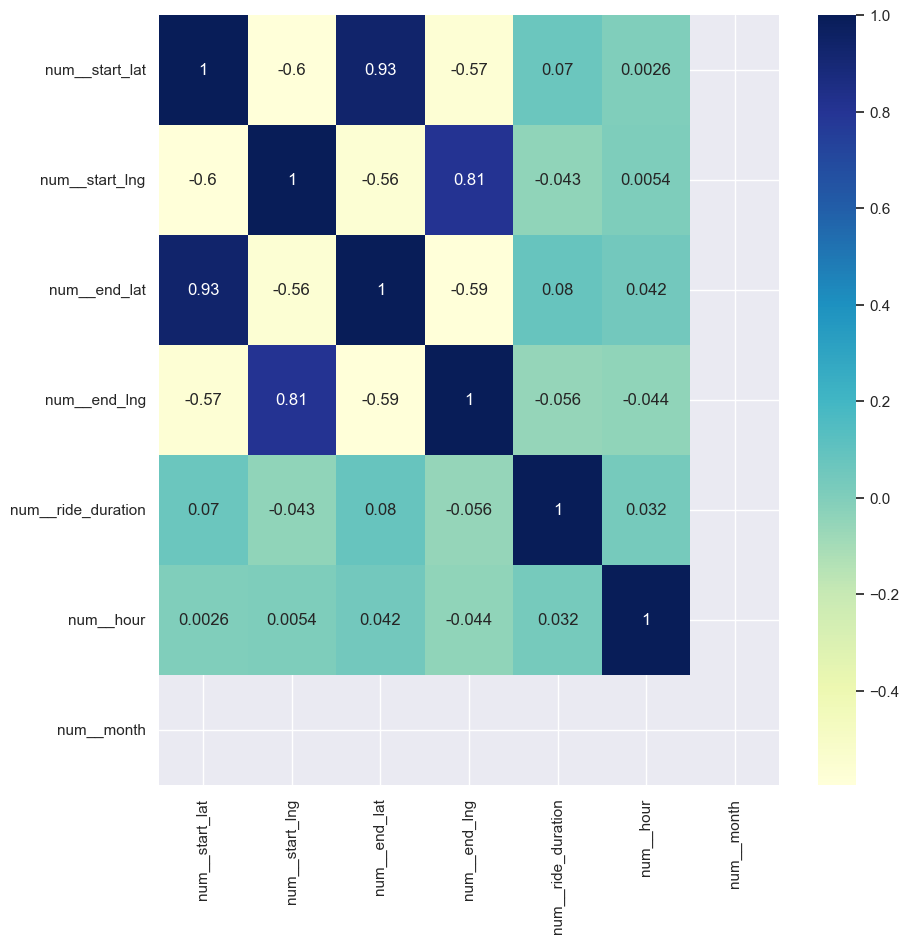

In [27]:
# Check for multicollinearity
plt.figure(figsize=(10,10))
cors = X_train1[["num__start_lat", "num__start_lng", "num__end_lat",  "num__end_lng", 
                 "num__ride_duration", "num__hour","num__month"]].corr()
sns.heatmap(cors, annot=True, cmap="YlGnBu")

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train1, y_train)
predictors = X_train1.columns


coef = pd.Series(dt.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

<bound method Series.to_frame of num__ride_duration                                      0.199180
num__start_lat                                          0.107271
num__start_lng                                          0.105491
num__hour                                               0.098228
num__end_lat                                            0.077605
                                                          ...   
cat__start_station_name_Damen Ave & 51st St             0.000000
cat__start_station_name_Washtenaw Ave & Madison St      0.000000
cat__start_station_name_Washtenaw Ave & Peterson Ave    0.000000
cat__start_station_name_Washtenaw Ave & Polk St         0.000000
cat__end_station_name_Cicero Ave & Grace St             0.000000
Length: 2274, dtype: float64>

In [29]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [30]:
def prepare(d):
    d.reset_index(drop=True, inplace=True)

    d["started_at"] = pd.to_datetime(d["started_at"])
    d["ended_at"] = pd.to_datetime(d["ended_at"]) 

    d["ride_duration"] = d["ended_at"]-d["started_at"]
    d['ride_duration']=d["ride_duration"].apply(lambda x:int(x.total_seconds()))
    
    d["hour"] = d["started_at"].dt.hour
    d["month"] = d["started_at"].dt.month
    d["day_week_name"] = d["started_at"].dt.day_name()

    d= drop_outlier(d, "ride_duration")

    d.drop(["ride_id", "started_at", "ended_at", "start_station_id", "end_station_id"],
           axis=1, inplace=True)
    
    target = "member_casual"
    X_test = d.drop(target, axis=1) #features
    y_test = d[target] #Target

    X_test = pd.DataFrame(pipe_fit.transform(X_test), columns = pipe_fit.get_feature_names_out().tolist())

    y_test = le.transform(y_test)
    
    return X_test, y_test

In [31]:
X_test, y_test = prepare(test)

/var/folders/c1/19k88tbs66jcykj85x8jnxhh0000gn/T/ipykernel_1140/3384555577.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.drop(["ride_id", "started_at", "ended_at", "start_station_id", "end_station_id"],
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/ut

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [33]:
ros = RandomOverSampler()

X_train_bal, y_train_bal = ros.fit_resample(X_train1, y_train)

In [34]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model


#Write a function evaluate the performance of the model, 
# print the AUC curve as well as the confusion matrix table
def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    col = le.inverse_transform([0,1])

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d',display_labels=col

 )
    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred, target_names=col))

    print("\n ROC curve : \n")
    sns.set_style("white")
    RocCurveDisplay.from_estimator(model,X_test, y_test,)
    plt.show()

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi


 Accuracy Score : 
  0.6709248183679204

 AUC Score : 
 0.6178614105143123

 Confusion Matrix : 
  [[14720 15973]
 [16820 52139]]

 Classification Report : 
               precision    recall  f1-score   support

      casual       0.47      0.48      0.47     30693
      member       0.77      0.76      0.76     68959

    accuracy                           0.67     99652
   macro avg       0.62      0.62      0.62     99652
weighted avg       0.67      0.67      0.67     99652


 ROC curve : 



/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


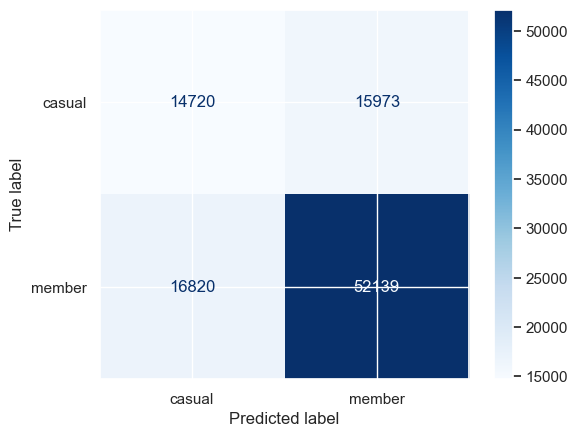

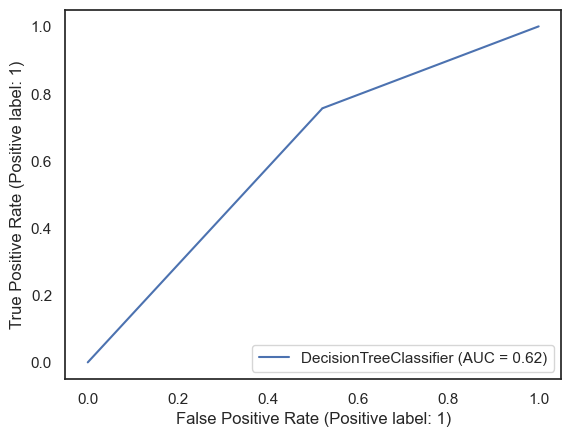

In [35]:
model1 = model_to_use("DT")
model1.fit(X_train_bal, y_train_bal)
performance (model1, X_train_bal, y_train_bal, X_test, y_test)

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIO


 Accuracy Score : 
  0.6172480231204592

 AUC Score : 
 0.6610477428282027

 Confusion Matrix : 
  [[18033 12660]
 [25482 43477]]

 Classification Report : 
               precision    recall  f1-score   support

      casual       0.41      0.59      0.49     30693
      member       0.77      0.63      0.70     68959

    accuracy                           0.62     99652
   macro avg       0.59      0.61      0.59     99652
weighted avg       0.66      0.62      0.63     99652


 ROC curve : 



/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


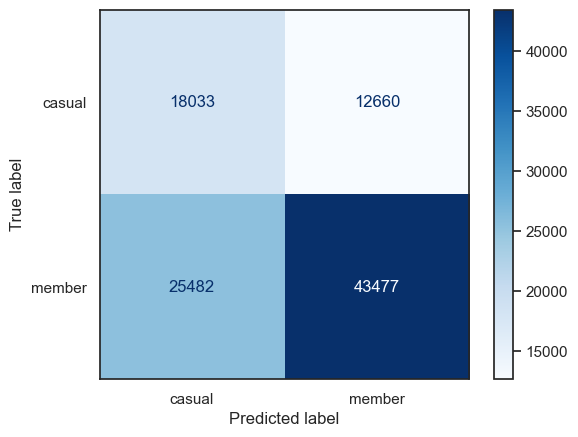

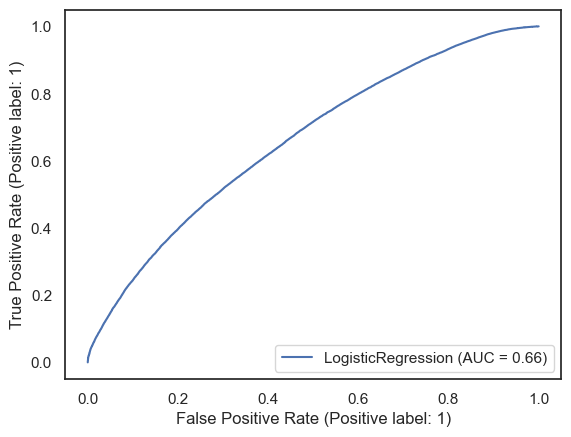

In [36]:
model2 = model_to_use("LR")
model2.fit(X_train_bal, y_train_bal)
performance (model2, X_train_bal, y_train_bal, X_test, y_test)

In [37]:
model3 = model_to_use("KNN")
model3.fit(X_train_bal, y_train_bal)
performance (model3, X_train_bal, y_train_bal, X_test, y_test)

/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/anaconda3/envs/llm2/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

In [ ]:
model4 = model_to_use("XGBC")
model4.fit(X_train_bal, y_train_bal)
performance (model4, X_train_bal, y_train_bal, X_test, y_test)

In [ ]:
model5 = model_to_use("RF")
model5.fit(X_train_bal, y_train_bal)
performance (model5, X_train_bal, y_train_bal, X_test, y_test)